# Proyek Analisis Data: [Bike Share]
- **Nama:** Dioko Benedictus Sinaga
- **Email:** m200b4ky1167@bangkit.academy
- **ID Dicoding:** diokoben29

## Menentukan Pertanyaan Bisnis

- Seberapa sering dan seberapa baru pengguna menyewa sepeda dari sistem bike sharing pada tahun 2011 -2012?
- Bagaimana karakteristik pengguna kasual dibandingkan dengan pengguna terdaftar dalam hal frekuensi dan waktu penyewaan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

## Data Wrangling

### Gathering Data

In [3]:
# Set path ke file kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\ASUS\Downloads\COLLEGE\Semester 7\Bangkit\Tugas\Belajar Analisis Data\venv'

# Nama dataset dan direktori tujuan
dataset = 'lakshmi25npathi/bike-sharing-dataset'
target_dir = './bike_sharing_dataset'

# Unduh dataset
os.system(f'kaggle datasets download -d {dataset} -p {target_dir}')

# Ekstrak file zip
zip_file_path = os.path.join(target_dir, 'bike-sharing-dataset.zip')

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_dir)

print("Dataset berhasil diunduh dan diekstrak.")


Dataset berhasil diunduh dan diekstrak.


In [4]:
daily_data = pd.read_csv(r'C:\Users\ASUS\Downloads\COLLEGE\Semester 7\Bangkit\Tugas\Belajar Analisis Data\bike_sharing_dataset\day.csv')
hour_data = pd.read_csv(r'C:\Users\ASUS\Downloads\COLLEGE\Semester 7\Bangkit\Tugas\Belajar Analisis Data\bike_sharing_dataset\hour.csv')

Dataset yang akan digunakan adalah -> day.csv

In [5]:
# Tampilkan beberapa baris awal dari dataset
print("Preview Data:")
display(daily_data.head(5),daily_data.tail(5))

Preview Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Insight:
1. Terdapat data sebanyak 731 data harian. Dimulai dari Januari hingga Desember 2012
2. Terdapa atribut season menunjukkan adanya empat musim, sehingga data tersebut pasti berlokasi di tempat yang mendapatkan empat musim

Pada data terdapat 15 Feature dan 731 Baris

### Assessing Data

In [6]:
# Cek nilai yang hilang
print("Cek Nilai yang Hilang:")
print(daily_data.isnull().sum())

Cek Nilai yang Hilang:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


insight: 
tidak ada data yang NaN

In [7]:
# Tampilkan statistik deskriptif
print("Statistik Deskriptif:")
display(daily_data.describe())


Statistik Deskriptif:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi Dataset:")
print(daily_data.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


insight:
1. Kolom dteday harus diubah ke tipe data 'datetime' agar bisa merepresentasikan tanggal dengan benar.
2. Karena weathersit sebelumnya merupakan fitur ordinal (berbentuk angka), akan lebih baik jika diubah menjadi one hot encoding agar dapat diolah dengan lebih optimal dalam model analisis data.

### Cleaning Data

In [9]:
# Copy dataset asli ke dalam variabel df
df = daily_data.copy()

# ubah kolom dteday menjadi tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('instant', inplace=True)

# ubah kolom weathersit menjadi fitur kategorikal...akan dienkode nanti
df['weathersit'].replace({1: 'Cerah', 2: 'Berkabut', 3: 'Salju Ringan', 4: 'Hujan Deras'}, inplace=True)

display(df.head(3))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13456\95853495.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weathersit'].replace({1: 'Cerah', 2: 'Berkabut', 3: 'Salju Ringan', 4: 'Hujan Deras'}, inplace=True)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349


## Exploratory Data Analysis (EDA)

In [10]:
# Cek informasi variabel dataframe yang baru
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 91.4+ KB


In [11]:
# Cek nilai unik dalam dataframe df
df.nunique()

dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [12]:
df['weathersit'].value_counts()

weathersit
Cerah           463
Berkabut        247
Salju Ringan     21
Name: count, dtype: int64

In [13]:
# Group data dengan season dan hitung mean untuk cnt
df_grouped_season = df.groupby('season')['cnt'].mean()
print(df_grouped_season)

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


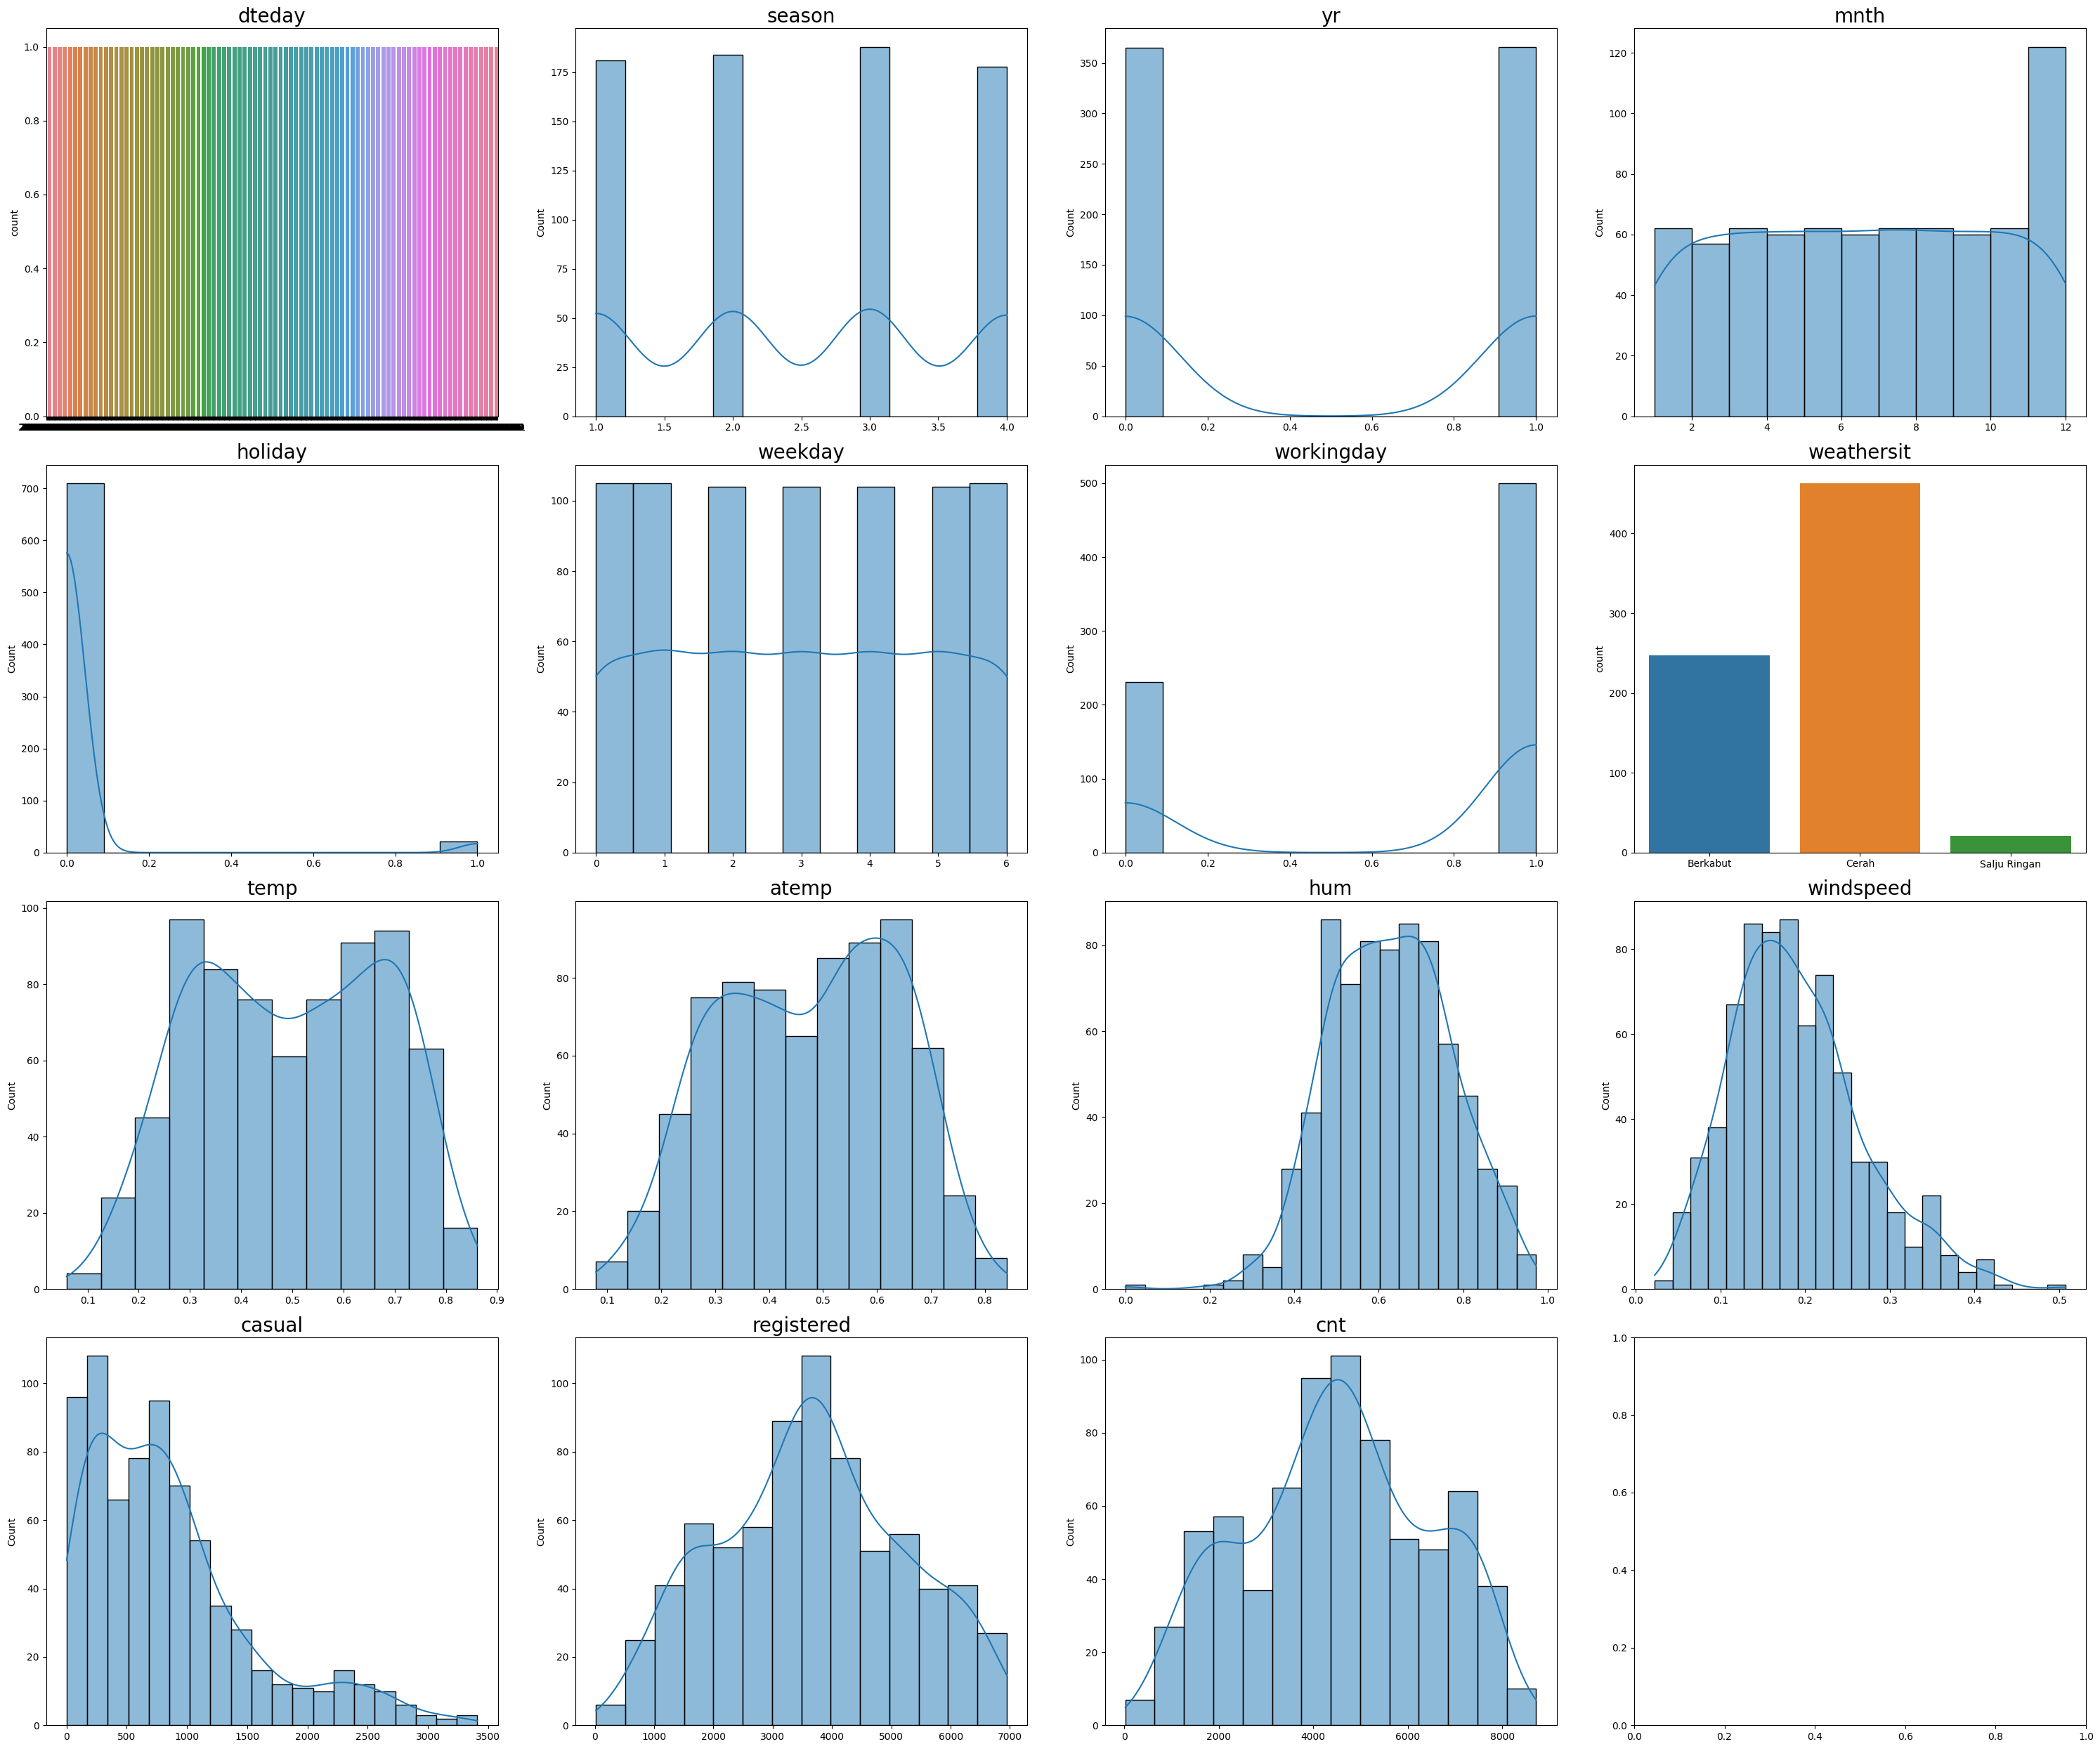

In [14]:
# Plotting distribusi data setiap kolom
fig, ax = plt.subplots(4, 4)  # Update jumlah subplots sesuai dengan jumlah kolom
fig.set_size_inches(30, 25)   # Ukuran plot

# Memisahkan fitur numerik dan kategorikal
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object', 'datetime64[ns]']).columns

# Loop untuk plotting
for i, feature in enumerate(df.columns):
    row = i // 4
    col = i % 4
    if feature in numerical_features:
        hist = sns.histplot(data=df, x=feature, ax=ax[row, col], kde=True)
    elif feature in categorical_features:
        hist = sns.countplot(data=df, x=feature, ax=ax[row, col], hue=feature)
    
    hist.set_title(feature, fontsize=20)
    hist.set_xlabel('')  # Menghapus label x-axis untuk kebersihan visual

# Adjust layout untuk mencegah overlap
plt.tight_layout()
plt.show()

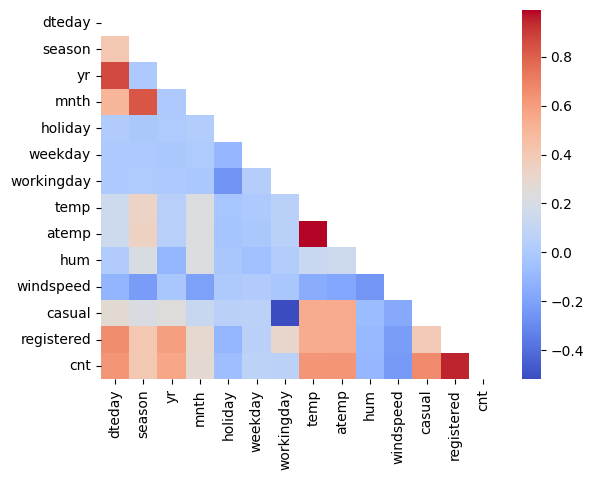

In [15]:
df_num = df.select_dtypes(exclude='object')
sns.heatmap(df_num.corr(), cmap='coolwarm',
            annot=False, fmt=".2f",mask=np.triu(np.ones_like(df_num.corr(), dtype=bool)))

plt.show()

In [16]:
# Membuat DataFrame baru untuk korelasi
df_cor = df_num.corr()

# Menampilkan DataFrame dengan hanya segitiga bawah
display(df_cor)

,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa sering dan seberapa baru pengguna menyewa sepeda dari sistem bike sharing pada tahun 2011 -2012?

Untuk menjawab pertanyaan tersebut, kita perlu menganalisis: 
- frekuensi => (berapa sering) pengguna menyewa sepeda dan
- recency => (seberapa baru) sewa terakhir mereka.

Sehingga langkah yang akan ditempuh adalah sebagai berikut:
1. Recency: Menghitung waktu sejak terakhir kali pengguna menyewa sepeda.
2. Frequency: Menghitung total jumlah transaksi (sewa sepeda) yang dilakukan oleh pengguna.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13456\3548648969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='yr', y='cnt', estimator=sum, palette='Reds')


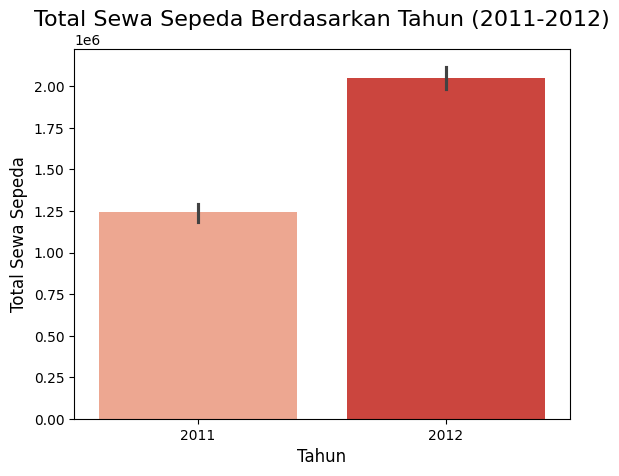

In [17]:
# Visualisasi Jumlah Total Sewa Sepeda Berdasarkan Tahun
sns.barplot(data=df, x='yr', y='cnt', estimator=sum, palette='Reds')
plt.title('Total Sewa Sepeda Berdasarkan Tahun (2011-2012)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Sewa Sepeda', fontsize=12)
plt.xticks([0, 1], ['2011', '2012'])
plt.show()

insight: "Peningkatan Signifikan pada Tahun 2012" 

Terdapat peningkatan yang cukup signifikan dalam jumlah total penyewaan sepeda pada tahun 2012 dibandingkan dengan tahun 2011. Ini mengindikasikan adanya pertumbuhan yang pesat dalam penggunaan layanan bike sharing selama periode tersebut.

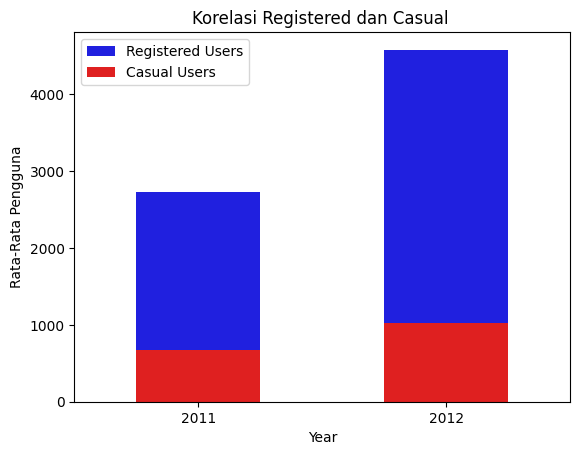

In [18]:
sns.barplot(x='yr',y='registered',data=df, label='Registered Users', color='blue', width=0.5, errorbar=None)
sns.barplot(x='yr',y='casual',data=df, label='Casual Users', color='red', width=0.5, errorbar=None)
plt.title('Korelasi Registered dan Casual ')
plt.xticks([0, 1], ['2011', '2012']) 
plt.xlabel('Year')
plt.ylabel('Rata-Rata Pengguna')
plt.show()

insight:
1. Peningkatan Pengguna Kasual:
Meskipun tidak sebesar pengguna terdaftar, jumlah pengguna kasual juga mengalami peningkatan. Hal ini mengindikasikan bahwa layanan bike sharing semakin populer dan menarik minat orang untuk mencoba layanan ini meskipun belum menjadi anggota.
2. Dominasi Pengguna Terdaftar:
Pada kedua tahun, pengguna terdaftar mendominasi jumlah total pengguna. Ini menunjukkan bahwa model bisnis berbasis keanggotaan cukup efektif dalam menarik dan mempertahankan pelanggan.
3. Pentingnya Program Keanggotaan: Program keanggotaan yang mengalami lonjakan memberikan kontribusi yang besar terhadap pertumbuhan bisnis rental sepeda. Oleh karena itu, perusahaan perlu terus meningkatkan manfaat dan kemudahan program keanggotaan untuk mempertahankan pengguna yang sudah ada dan menarik lebih banyak pengguna baru.
4. Potensi Pertumbuhan Pengguna Kasual: Meskipun pengguna terdaftar mendominasi potensi pengguna kasual masih cukup besar. Perusahaan dapat mempertimbangkan strategi untuk mengkonversi pengguna kasual menjadi pengguna terdaftar, misalnya dengan menawarkan program promosi khusus seperti miles pada airlines atau meningkatkan fleksibilitas penggunaan untuk pengguna non-anggota.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13456\221093245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='mnth', y='cnt', estimator=sum, palette='Greens')


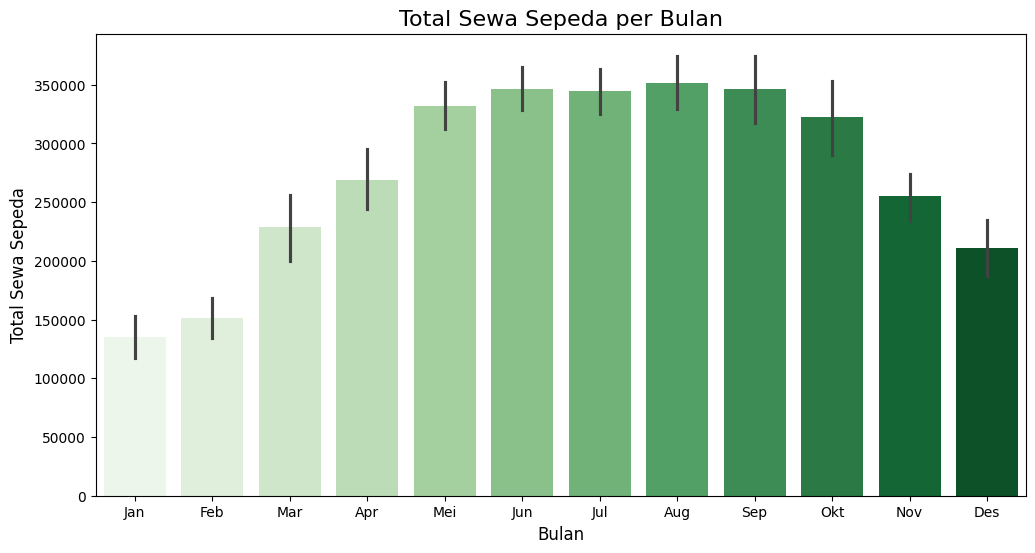

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='mnth', y='cnt', estimator=sum, palette='Greens')
plt.title('Total Sewa Sepeda per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Sewa Sepeda', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

Insight:
1. Puncak Penggunaan: Bulan-bulan Juni, Juli, dan Agustus menunjukkan jumlah penyewaan tertinggi. Ini mengindikasikan bahwa periode liburan dan cuaca yang cerah mendorong lebih banyak orang untuk menggunakan sepeda sebagai alternatif transportasi atau rekreasi.

Sehingga,

>Perusahaan perlu menyesuaikan strategi pemasarannya sesuai dengan musim. Pada bulan-bulan dengan jumlah penyewaan tinggi, fokus dapat diarahkan pada promosi untuk meningkatkan frekuensi penggunaan. Sedangkan pada bulan-bulan dengan jumlah penyewaan rendah, perusahaan dapat menawarkan promo menarik untuk menarik pengguna baru atau mempertahankan pengguna yang sudah ada.

2. Penurunan di Akhir Tahun: Terdapat penurunan yang cukup signifikan pada bulan-bulan terakhir tahun ini (November dan Desember).  Mengingat bahwa data ini berlokasi pada daerah yang mengalami 4 musim, sehingga hal ini mungkin disebabkan oleh cuaca yang semakin dingin dan hari yang semakin pendek, yang membuat orang kurang tertarik untuk bersepeda.

Sehingga,

>Perusahaan dapat mempertimbangkan untuk mengembangkan produk atau layanan tambahan yang dapat menarik pengguna selama musim dingin, seperti aksesori sepeda yang menghangatkan atau program bersepeda indoor.

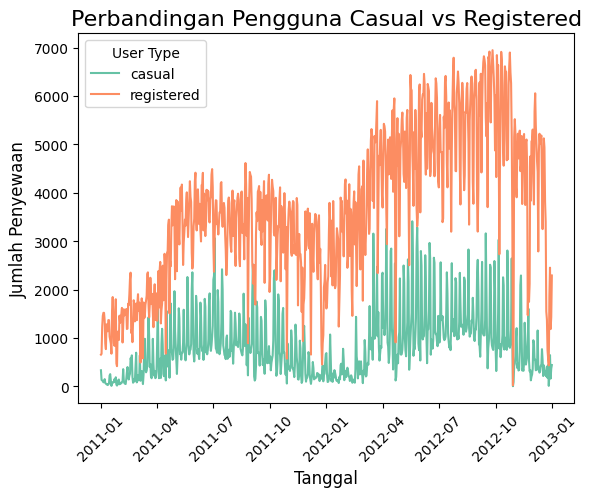

In [20]:
df_melt = df.melt(id_vars=['dteday'], value_vars=['casual', 'registered'], var_name='User Type', value_name='Count')
sns.lineplot(data=df_melt, x='dteday', y='Count', hue='User Type', palette='Set2')
plt.title('Perbandingan Pengguna Casual vs Registered', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.show()

Insight:
1. Terdapat fluktuasi harian yang signifikan pada jumlah pengguna, baik kasual maupun terdaftar. Ini menunjukkan adanya faktor-faktor harian yang mempengaruhi keputusan pengguna untuk menyewa sepeda, seperti cuaca, hari kerja, dan acara khusus.
2. Ketergantungan pada Cuaca: Fluktuasi harian yang tajam menunjukkan bahwa cuaca memiliki pengaruh yang sangat besar terhadap jumlah penyewaan. Hari-hari yang cerah dan hangat cenderung menarik lebih banyak pengguna.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13456\389149905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='weekday', y='cnt', estimator=sum, palette='Oranges')


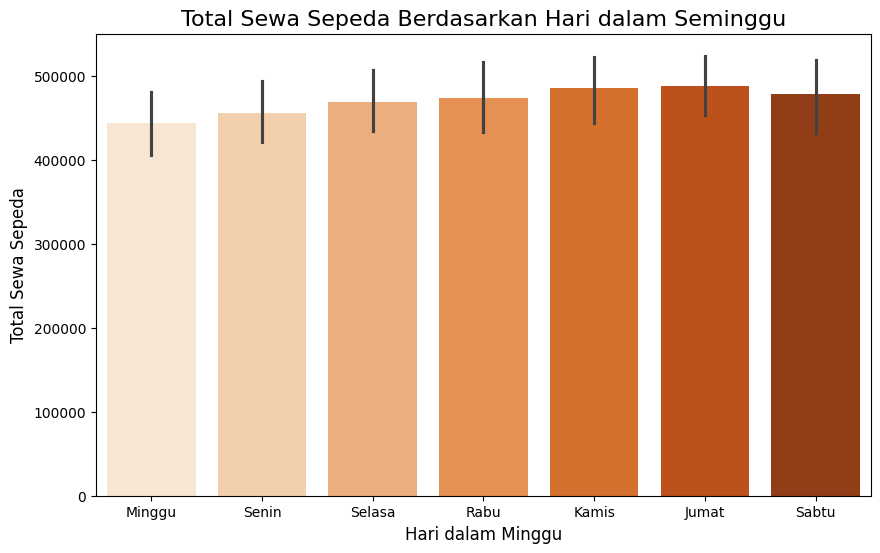

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='weekday', y='cnt', estimator=sum, palette='Oranges')
plt.title('Total Sewa Sepeda Berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari dalam Minggu', fontsize=12)
plt.ylabel('Total Sewa Sepeda', fontsize=12)
plt.xticks(ticks=range(7), labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

insight:

terjadi kenaikan rata-rata peminjaman sepeda pada periode 2011-2012 pada hari senin hingga puncaknya pada hari jumat setiap minggunya dalam periode tersebut. Hal tersebut menandakan, pelanggan banyak meminjam sepeda pada hari workdays dikarenakan mereka lebih banyak beraktivitas diluar rumah seperti bekerja, sekolah, dan berpergian, sedangkan untuk weekend terjadi penurunan karena weekend adalah hari-hari untuk mereka beristirahat.

---

### Pertanyaan 2: Bagaimana karakteristik pengguna kasual dibandingkan dengan pengguna terdaftar dalam hal frekuensi dan waktu penyewaan?

In [22]:
# 1. Agregasi Total Penyewaan Sepeda Berdasarkan Bulan
df['month'] = df['dteday'].dt.month
monthly_agg = df.groupby('month')[['casual', 'registered']].sum().reset_index()

# 2. Agregasi Total Penyewaan Sepeda Berdasarkan Hari dalam Seminggu
df['weekday_name'] = df['dteday'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_agg = df.groupby('weekday_name')[['casual', 'registered']].sum().reset_index()
weekly_agg['weekday_name'] = pd.Categorical(weekly_agg['weekday_name'], categories=weekday_order, ordered=True)
weekly_agg_sorted = weekly_agg.sort_values('weekday_name').reset_index(drop=True)

# 3. Agregasi Total Penyewaan Berdasarkan Workingday dan Holiday
workingday_agg = df.groupby('workingday')[['casual', 'registered']].sum().reset_index()
holiday_agg = df.groupby('holiday')[['casual', 'registered']].sum().reset_index()

print('Data Penyewaan Sepeda Berdasarkan Bulan'.upper())
display(monthly_agg)
print('Data Penyewaan Sepeda Berdasarkan Hari dalam Seminggu'.upper())
display(weekly_agg_sorted)
print('Data Penyewaan Berdasarkan Workingday dan Holiday'.upper())
display(holiday_agg)

DATA PENYEWAAN SEPEDA BERDASARKAN BULAN


,month,casual,registered
0,1,12042,122891
1,2,14963,136389
2,3,44444,184476
3,4,60802,208292
4,5,75285,256401
5,6,73906,272436
6,7,78157,266791
7,8,72039,279155
8,9,70323,275668
9,10,59760,262592


DATA PENYEWAAN SEPEDA BERDASARKAN HARI DALAM SEMINGGU


,weekday_name,casual,registered
0,Monday,70784,384719
1,Tuesday,57843,411266
2,Wednesday,57319,415729
3,Thursday,61460,423935
4,Friday,78238,409552
5,Saturday,153852,323955
6,Sunday,140521,303506


DATA PENYEWAAN BERDASARKAN WORKINGDAY DAN HOLIDAY


,holiday,casual,registered
0,0,597658,2616586
1,1,22359,56076


insight Tabel "DATA PE"NYEWAAN SEPEDA BERDASARKAN BULAN" :
1. Peningkatan Penyewaan Sepeda:

- Terdapat peningkatan signifikan dalam total penyewaan sepeda oleh pengguna terdaftar dari bulan Januari (122.891) hingga bulan Mei (256.401), menunjukkan bahwa semakin banyak orang mendaftar untuk menggunakan layanan bike-sharing.
- Pengguna kasual juga menunjukkan tren peningkatan, dengan jumlah penyewaan tertinggi pada bulan Juni (73.906), meskipun tidak sebanyak pengguna terdaftar.

2. Terjadi Penurunan Penyewaan: Setelah bulan Juni, jumlah penyewaan mulai menurun untuk kedua kategori pengguna, dengan penurunan yang lebih tajam pada bulan November dan Desember. Hal ini menunjukkan bahwa minat terhadap penyewaan sepeda menurun pada bulan-bulan musim dingin, ketika aktivitas luar ruangan berkurang.

----

insight Tabel "DATA PENYEWAAN SEPEDA BERDASARKAN HARI DALAM SEMINGGU" :
1. Pengguna Kasual Lebih Banyak pada Akhir Pekan
2. Pengguna Terdaftar Dominan pada Hari Kerja
3. Hari Senin Memiliki Jumlah Penyewaan Terendah untuk Pengguna Kasual

Penyewaan sepeda menunjukkan pola yang berbeda antara pengguna kasual dan terdaftar sepanjang minggu. Pengguna kasual cenderung lebih aktif pada akhir pekan, sementara pengguna terdaftar memanfaatkan layanan lebih banyak pada hari kerja.

---

Insight Tabel "DATA PENYEWAAN BERDASARKAN WORKINGDAY DAN HOLIDAY":
1. Signifikan Menurunnya Penyewaan pada Hari Libur
2. Meskipun ada penurunan total penyewaan pada hari libur, pengguna terdaftar masih menyumbang lebih banyak penyewaan dibandingkan pengguna kasual. Hal ini mungkin menunjukkan bahwa pengguna terdaftar memiliki kecenderungan untuk menggunakan sepeda meskipun pada hari libur, yang mungkin dipengaruhi oleh faktor kebutuhan transportasi.

<Figure size 1000x600 with 0 Axes>

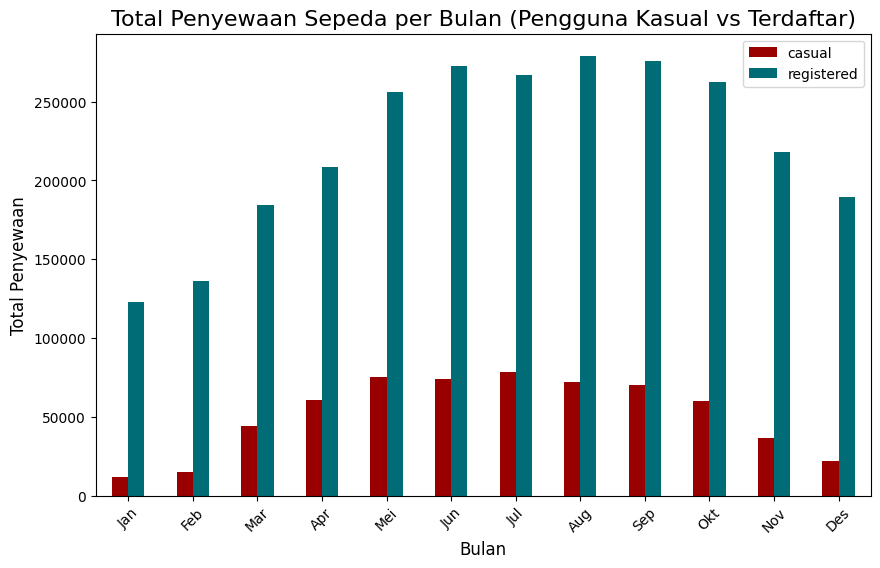

In [23]:
# Visualisasi Penyewaan Bulanan
plt.figure(figsize=(10, 6))
monthly_agg.plot(x='month', y=['casual', 'registered'], kind='bar', figsize=(10, 6), color=['#990000', '#006c75'])
plt.title('Total Penyewaan Sepeda per Bulan (Pengguna Kasual vs Terdaftar)', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'], rotation=45)
plt.show()

insight:

Terdapat peningkatan signifikan dalam total penyewaan sepeda oleh pengguna terdaftar dari bulan Januari hingga bulan Mei yang menunjukkan bahwa semakin banyak orang mendaftar untuk menggunakan layanan sepeda.

Terjadi Penurunan Penyewaan: Setelah bulan Juni, jumlah penyewaan mulai menurun untuk kedua kategori pengguna, dengan penurunan yang lebih tajam pada bulan November dan Desember. Hal ini menunjukkan bahwa minat terhadap penyewaan sepeda menurun pada bulan-bulan musim dingin, ketika aktivitas luar ruangan berkurang.


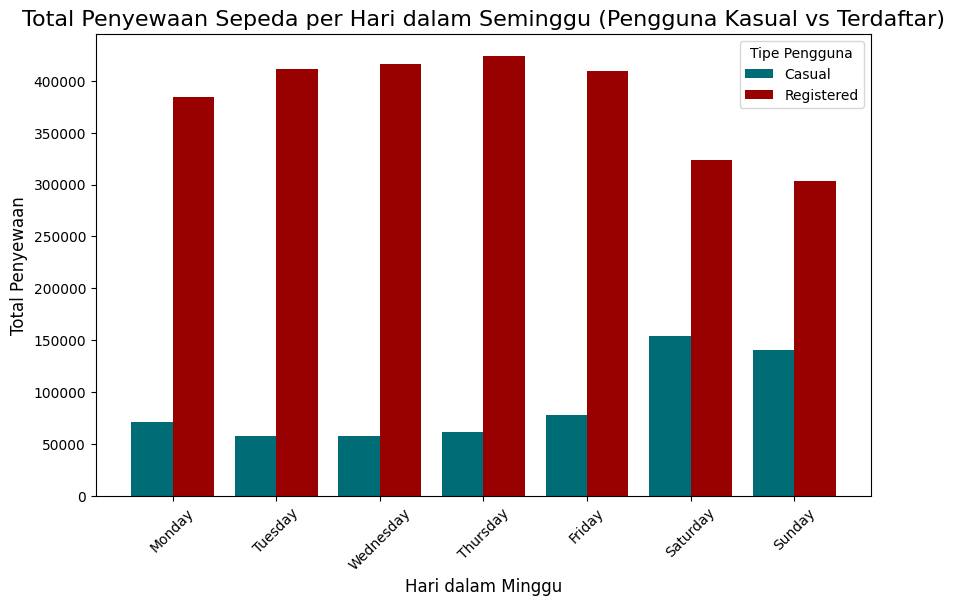

In [25]:
# Visualisasi Penyewaan Berdasarkan Hari dalam Minggu
plt.figure(figsize=(10, 6))

# Membuat posisi untuk setiap batang sehingga bisa tampil side-by-side
bar_width = 0.4
index = range(len(weekly_agg_sorted))

# Plot untuk casual users
plt.bar([i - bar_width / 2 for i in index], weekly_agg_sorted['casual'], width=bar_width, color='#006c75', label='Casual')

# Plot untuk registered users
plt.bar([i + bar_width / 2 for i in index], weekly_agg_sorted['registered'], width=bar_width, color='#990000', label='Registered')

# Menambahkan title dan labels
plt.title('Total Penyewaan Sepeda per Hari dalam Seminggu (Pengguna Kasual vs Terdaftar)', fontsize=16)
plt.xlabel('Hari dalam Minggu', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)

# Mengganti label x-axis dengan nama hari dalam minggu
plt.xticks(index, weekly_agg_sorted['weekday_name'], rotation=45)

# Menambahkan legenda
plt.legend(title='Tipe Pengguna')

plt.show()


Insgiht:

Terjadi peningkatan penggunaan sepeda dari hari Senin hingga puncaknya pada hari Kamis di setiap minggunya dalam rentang tahun 2011-2012. Hal tersebut menunjukkan bahwa secara umum pelanggan menggunakan layanan sepeda pada sebagian besar workdays hal ini berkaitan pada aktivitas pelanggan pada workdays yang lebih banyak beraktivitas di luar rumah. Sedangkan untuk weekend terjadi penurunan yang mungkin disebabkan oleh aktivitas pelanggan yang berkurang di hari weekend

---

## Conclusion

- Seberapa sering dan seberapa baru pengguna menyewa sepeda dari sistem bike sharing pada tahun 2011-2012?
 
> Seberapa Sering: Frekuensi penyewaan sepeda sangat bervariasi tergantung pada faktor-faktor seperti musim, hari dalam seminggu, dan cuaca. Secara umum, pengguna cenderung menyewa sepeda lebih sering pada musim panas dan hari-hari yang cerah. Rata-rata peminjaman sepeda terjadi mulai hari senin hingga puncaknya pada hari jumat.

>Seberapa Baru: Grafik ini tidak secara langsung menunjukkan seberapa baru pengguna. Namun, mengingat pertumbuhan jumlah pengguna terdaftar yang signifikan, dapat disimpulkan bahwa terdapat banyak pengguna baru yang bergabung dengan layanan bike sharing selama periode 2011-2012.

- Bagaimana karakteristik pengguna kasual dibandingkan dengan pengguna terdaftar dalam hal frekuensi dan waktu penyewaan?"

>Secara keseluruhan, pengguna terdaftar  jauh lebih sering dan konsisten dalam penggunaannya dibandingkan  pengguna sesekali. Pengguna biasa cenderung  aktif di luar akhir pekan dan hari libur, sementara pengguna terdaftar menunjukkan pola yang lebih konsisten sepanjang minggu.

>Selain itu, pengguna terdaftar lebih cenderung menyewa sepeda bahkan ketika sedang berlibur, sementara pengguna sesekali cenderung lebih jarang menggunakannya pada saat-saat tersebut. Wawasan ini akan sangat berharga bagi penyedia layanan berbagi sepeda dalam mengembangkan strategi pemasaran dan layanan yang lebih efektif untuk menarik dan mempertahankan dua segmen pengguna: B. Penawaran promosi untuk pengguna biasa dan program loyalitas untuk pengguna terdaftar selama liburan.

